<a href="https://colab.research.google.com/github/babialvesz/longevidade/blob/main/tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalando pacotes

%pip install pandas numpy matplotlib

In [ ]:
!pip install openpyxl xlrd

In [ ]:
#importanto pacotes e 'renomeando' para o uso

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Tratando dados da População por idade**



In [ ]:
#lendo (.read) os arquivos csv cujo o delimitador é ';'

df_pop = pd.read_csv('/content/pop_por_idade.csv', delimiter=';')

In [ ]:
#excluindo colunas, que é referenciado pelo 'axis=1 (se 'axis=0', ele irá se refirir a linhas), com o '.drop'

df_pop = df_pop.drop('15 a 17 anos', axis=1)

In [ ]:
df_pop = df_pop.drop('Idade ignorada', axis=1)

In [ ]:
#somando '.sum' duas colunas 'axis=1'

df_pop['20 a 29 anos']  = df_pop[['20 a 24 anos', '25 a 29 anos']].sum(axis=1)

In [ ]:
#excluindo multiplas colunas passando uma lista dentro de []

df_pop = df_pop.drop(['Total', '20 a 24 anos', '25 a 29 anos', ], axis=1)

In [ ]:
#ordenando as colunas

df_pop = df_pop[['Cód.', 'Unidade da Federação', '0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 anos ou mais']]

In [ ]:
df_pop.head()

,Cód.,Unidade da Federação,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 anos ou mais
0,11,Rondônia,113450,117536,117166,122058,250571,253223,230699,180447,118007,78039
1,12,Acre,71001,74586,75573,78689,146095,125875,108066,71717,45538,32878
2,13,Amazonas,351726,367770,355930,367978,695041,596414,510664,339108,215739,141243
3,14,Roraima,64752,63243,58213,56875,114411,98674,78224,51855,31467,18993
4,15,Pará,632045,669620,689277,726778,1373851,1291231,1094817,766180,507379,368953


##**Tratando dados de óbitos por federação**

In [ ]:
#lendo (.read) os arquivos csv cujo o delimitador é ';'

df_mort = pd.read_csv('/content/mortalidade_2022.csv', delimiter=';', encoding='ISO-8859-1')

In [ ]:
#excluindo colunas, que é referenciado pelo 'axis=1 (se 'axis=0', ele irá se refirir a linhas), com o '.drop'

df_mort.drop('Total', axis=1, inplace=True)

In [ ]:
#excluindo NaN - '.dropna()'

df_mort = df_mort.dropna()

In [ ]:
#separando elementos de uma mesma célula para colunas diferentes

df_mort[['Cód.', 'Unidade da Federação']] = df_mort['Unidade da Federação'].str.split(' ', n=1, expand=True)

<ipython-input-14-e8b0b9c5b4f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mort[['Cód.', 'Unidade da Federação']] = df_mort['Unidade da Federação'].str.split(' ', n=1, expand=True)


In [ ]:
#somando colunas

df_mort['0 a 4 anos']  = df_mort[['Menor 1 ano', '1 a 4 anos']].sum(axis=1)

<ipython-input-15-907b393bf90c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mort['0 a 4 anos']  = df_mort[['Menor 1 ano', '1 a 4 anos']].sum(axis=1)


In [ ]:
#excluindo multiplas colunas passando uma lista dentro de []

df_mort = df_mort.drop(['Menor 1 ano', '1 a 4 anos', '80 anos e mais', 'Idade ignorada'], axis=1)

In [ ]:
#ordenando as colunas

df_mort = df_mort[['Cód.', 'Unidade da Federação', '0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos', '30 a 39 anos',  '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos']]

In [ ]:
#renomeando colunas

df_mort = df_mort.rename(columns={'70 a 79 anos': '70 anos ou mais'})

In [ ]:
df_mort.head()

,Cód.,Unidade da Federação,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 anos ou mais
0,11,Rondônia,403.0,23.0,54.0,138.0,474.0,606.0,875.0,1238.0,1776.0,2168.0
1,12,Acre,299.0,16.0,31.0,89.0,205.0,257.0,317.0,466.0,692.0,770.0
2,13,Amazonas,1411.0,100.0,130.0,450.0,1495.0,1371.0,1676.0,2255.0,3174.0,3564.0
3,14,Roraima,322.0,24.0,38.0,81.0,248.0,281.0,286.0,379.0,533.0,518.0
4,15,Pará,2273.0,189.0,284.0,848.0,2830.0,2821.0,3619.0,4859.0,7408.0,8653.0


##**Calculando taxa de mortalidade**

In [ ]:
merged_df = pd.merge(df_pop, df_mort, on='Unidade da Federação', suffixes=('_pop', '_obitos'))

In [ ]:
faixas_etarias = ['0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos',
                  '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 anos ou mais']


In [ ]:
sns.set(style="whitegrid")

In [ ]:
merged_df.head()

,Cód._pop,Unidade da Federação,0 a 4 anos_pop,5 a 9 anos_pop,10 a 14 anos_pop,15 a 19 anos_pop,20 a 29 anos_pop,30 a 39 anos_pop,40 a 49 anos_pop,50 a 59 anos_pop,...,taxa_mortalidade_5 a 9 anos,taxa_mortalidade_10 a 14 anos,taxa_mortalidade_15 a 19 anos,taxa_mortalidade_20 a 29 anos,taxa_mortalidade_30 a 39 anos,taxa_mortalidade_40 a 49 anos,taxa_mortalidade_50 a 59 anos,taxa_mortalidade_60 a 69 anos,taxa_mortalidade_70 anos ou mais,sobreviventes_0_4
0,11,Rondônia,113450,117536,117166,122058,250571,253223,230699,180447,...,5.110261e+08,2.169741e+08,8.844783e+07,5.286308e+07,4.178597e+07,2.636560e+07,1.457569e+07,6.644538e+06,3.599585e+06,100000
1,12,Acre,71001,74586,75573,78689,146095,125875,108066,71717,...,4.661625e+08,2.437839e+08,8.841461e+07,7.126585e+07,4.897860e+07,3.409022e+07,1.538991e+07,6.580636e+06,4.269870e+06,100000
2,13,Amazonas,351726,367770,355930,367978,695041,596414,510664,339108,...,3.677700e+08,2.737923e+08,8.177289e+07,4.649104e+07,4.350212e+07,3.046921e+07,1.503805e+07,6.797070e+06,3.963047e+06,100000
3,14,Roraima,64752,63243,58213,56875,114411,98674,78224,51855,...,2.635125e+08,1.531921e+08,7.021605e+07,4.613347e+07,3.511530e+07,2.735105e+07,1.368206e+07,5.903752e+06,3.666602e+06,100000
4,15,Pará,632045,669620,689277,726778,1373851,1291231,1094817,766180,...,3.542963e+08,2.427032e+08,8.570495e+07,4.854597e+07,4.577210e+07,3.025192e+07,1.576827e+07,6.849069e+06,4.263874e+06,100000


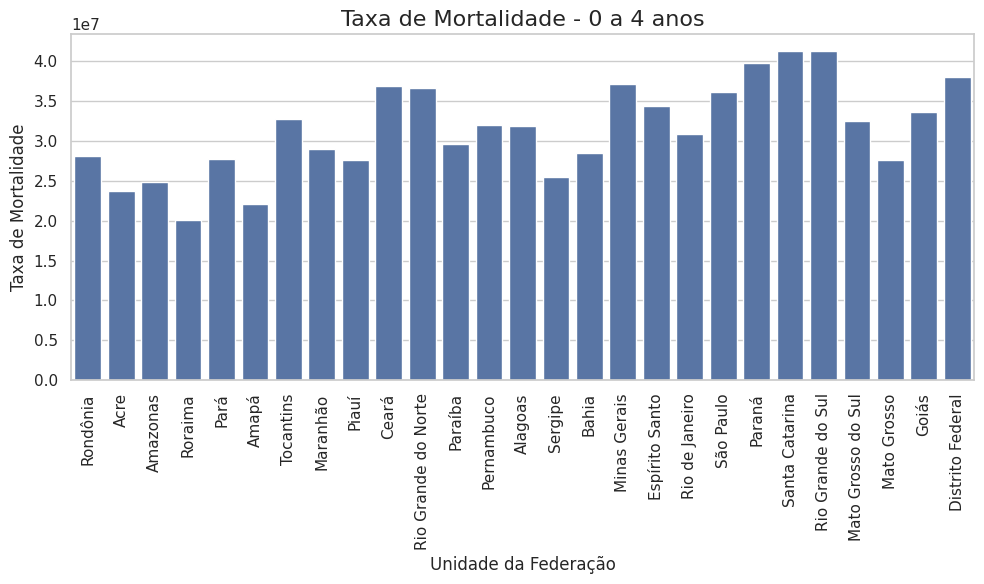

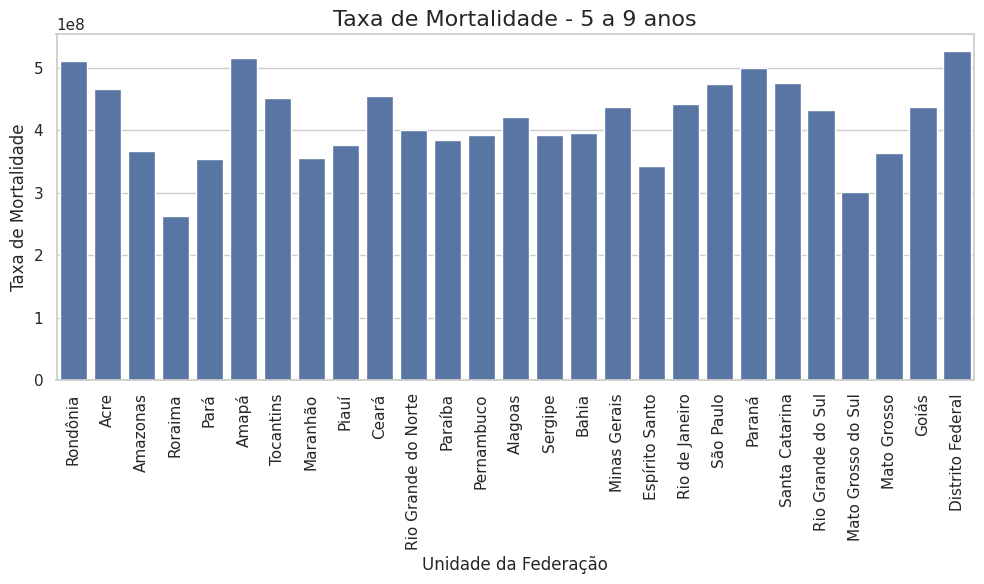

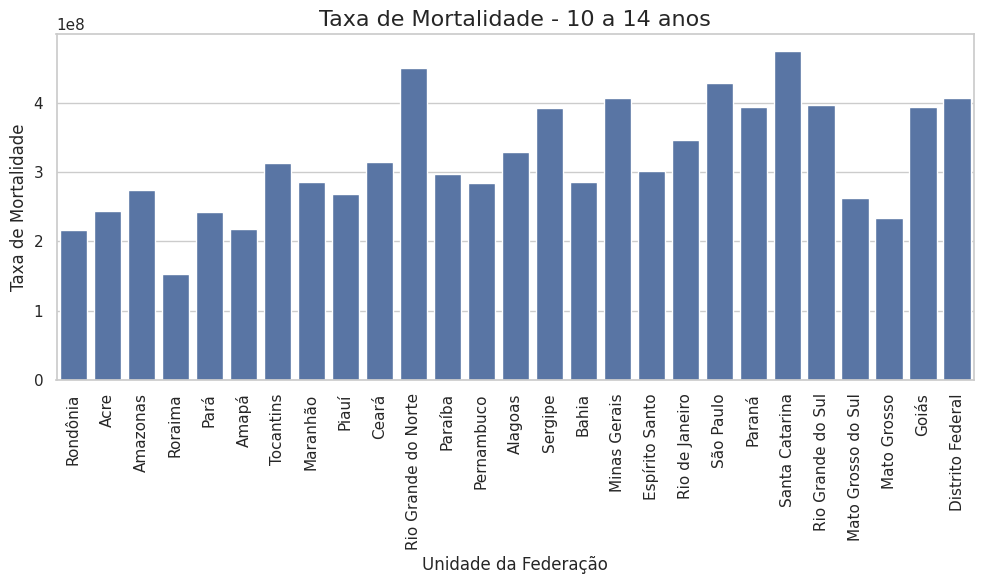

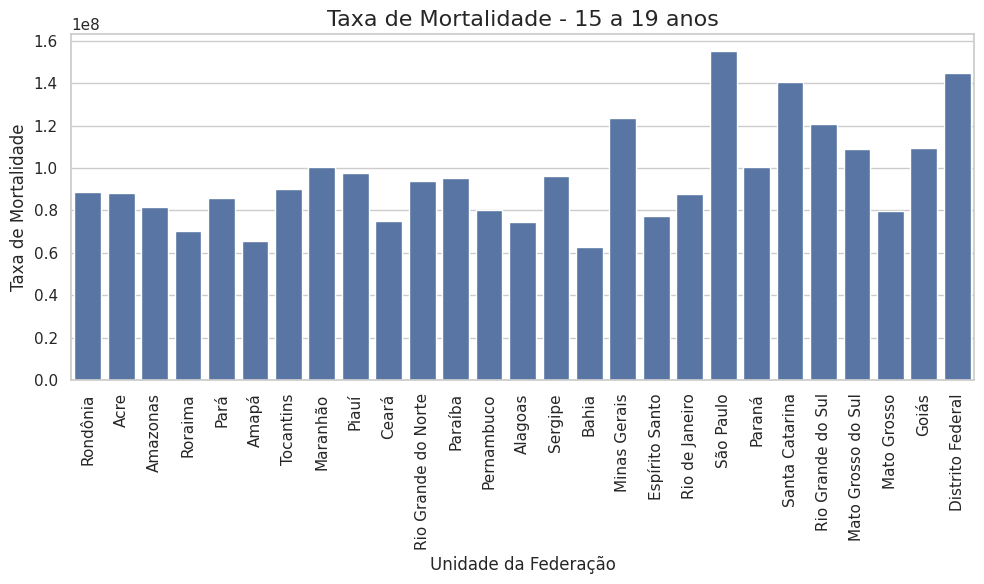

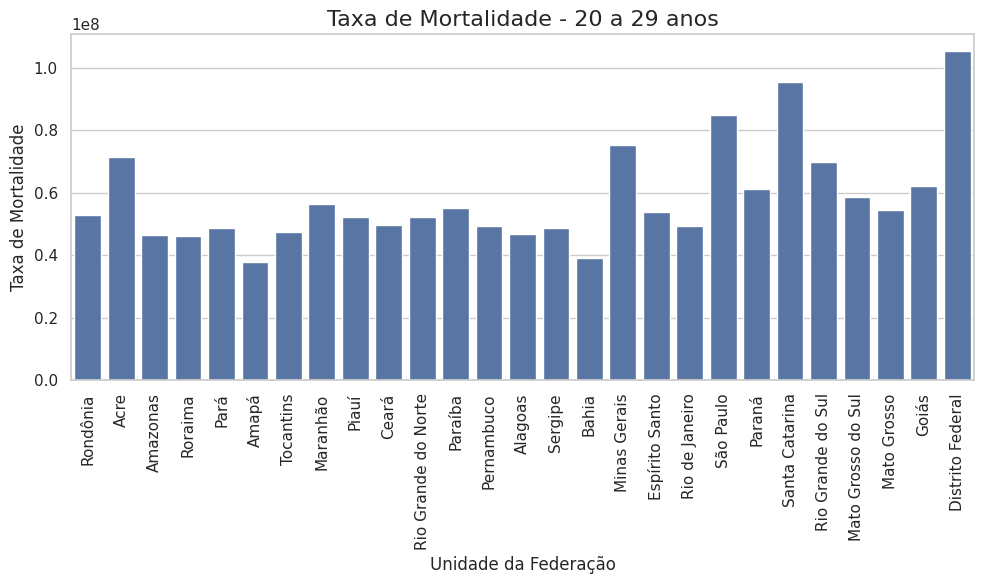

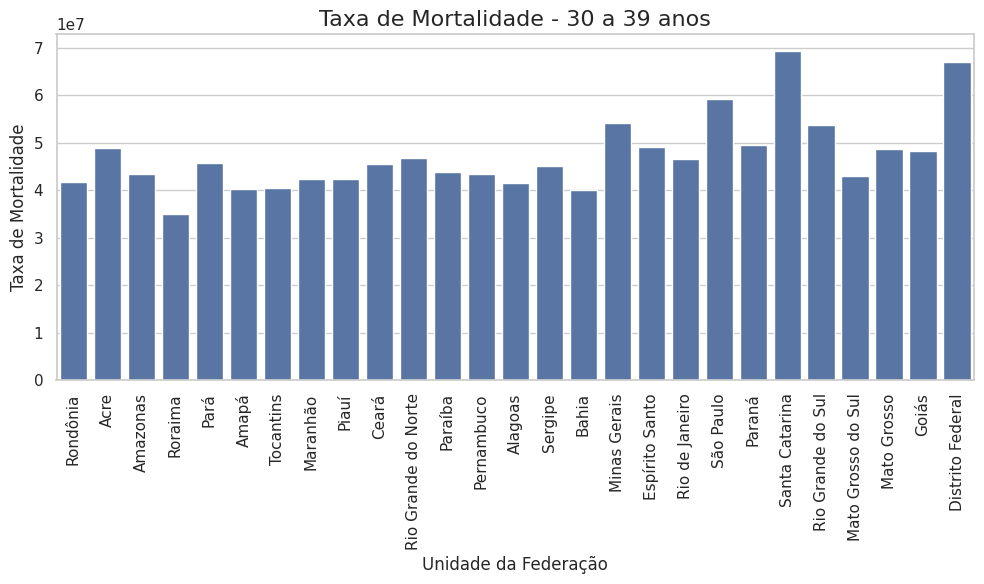

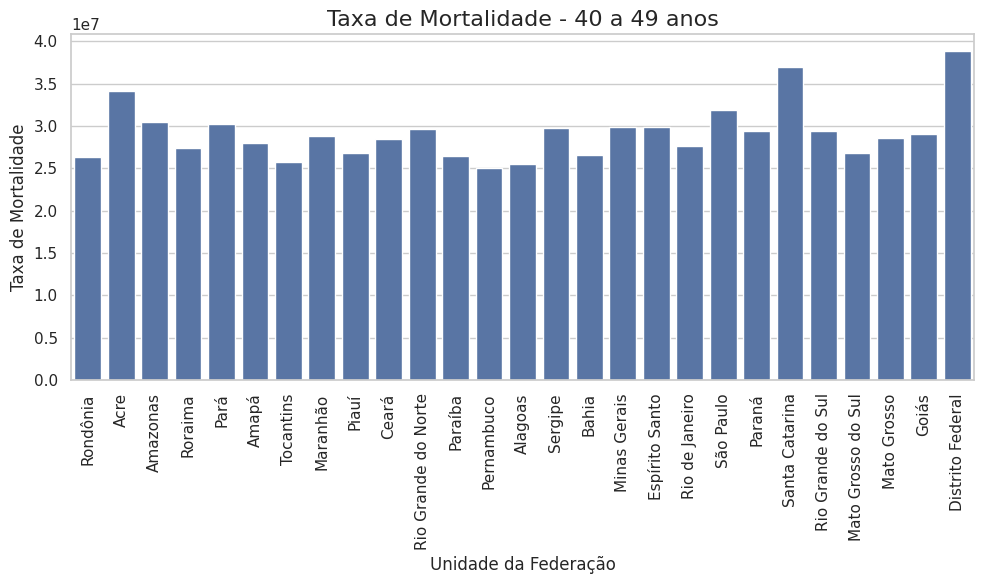

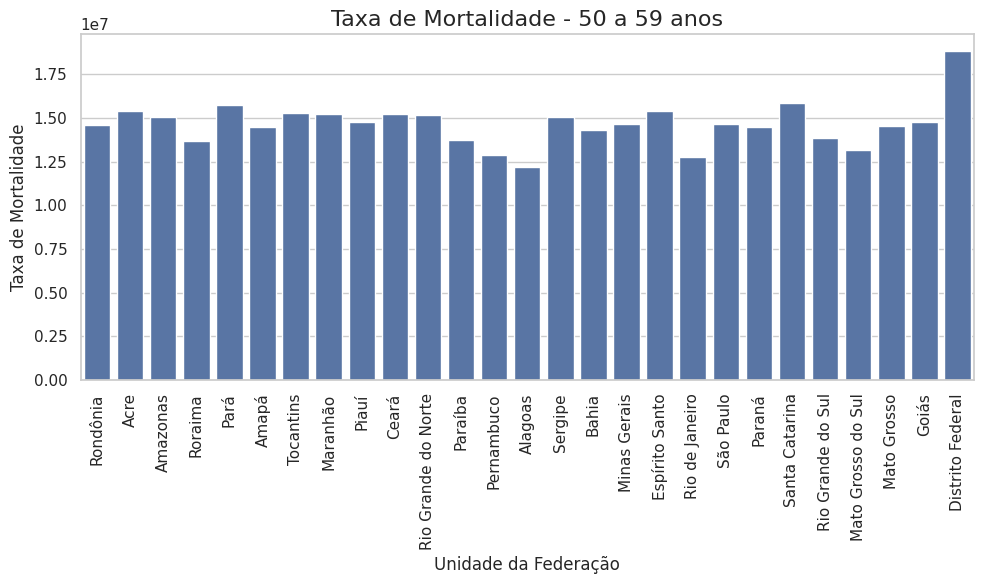

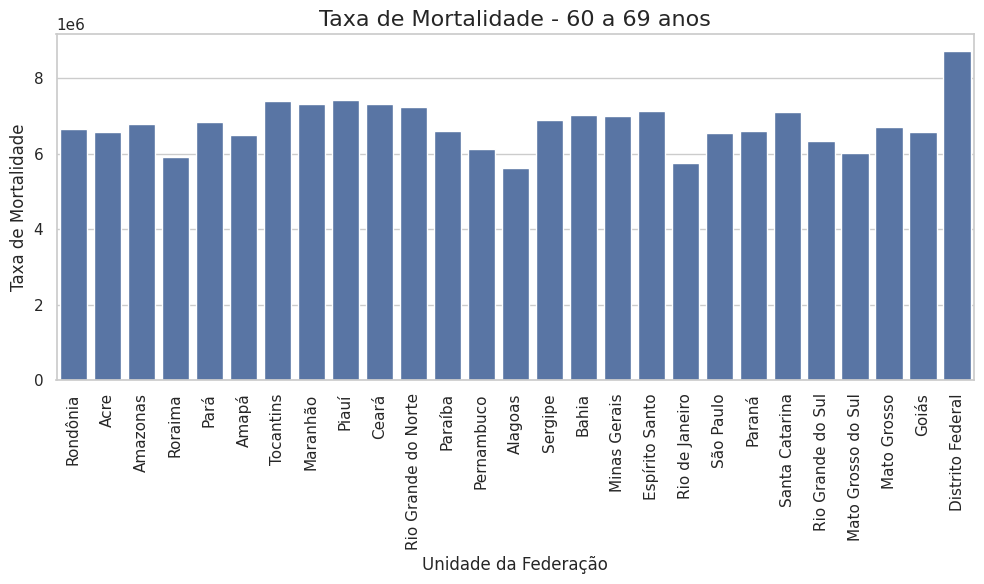

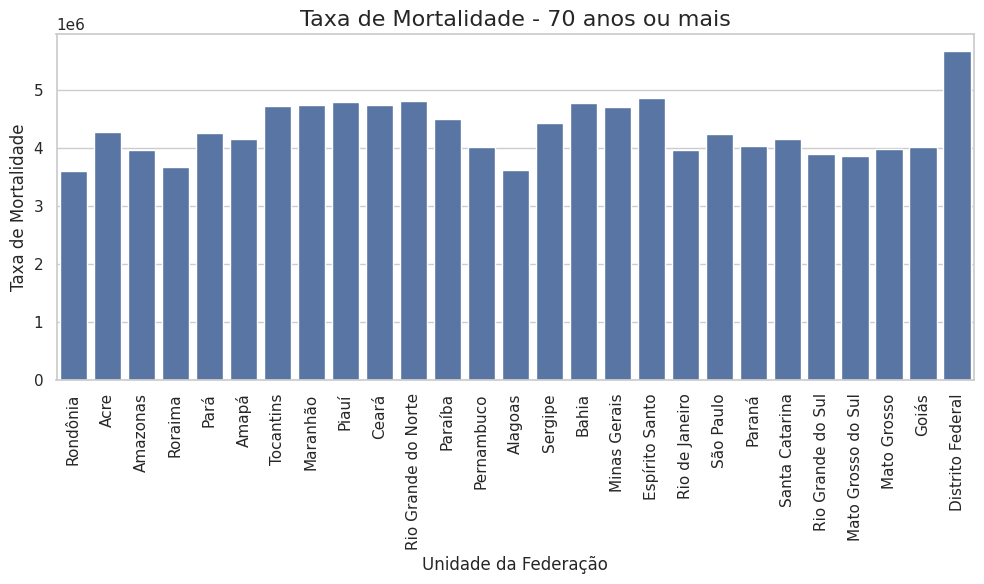

In [ ]:
for faixa in faixas_etarias:
    # Supondo que df_mort tenha colunas no formato 'Óbitos_faixa', adicione a coluna de taxa de mortalidade
    merged_df[f'taxa_mortalidade_{faixa}'] = (merged_df[f'{faixa}_pop'] / merged_df[f'{faixa}_obitos']) * 100000

    # Geração do gráfico de barras para cada faixa etária
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Unidade da Federação', y=f'taxa_mortalidade_{faixa}', data=merged_df)

    # Configurações do gráfico
    plt.title(f'Taxa de Mortalidade - {faixa}', fontsize=16)
    plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X
    plt.xlabel('Unidade da Federação')
    plt.ylabel('Taxa de Mortalidade')
    plt.tight_layout()
    plt.show()  # Adiciona para garantir que o gráfico seja exibido

O gráfico apresentado exibe a taxa de mortalidade para a faixa etária de 0 a 4 anos em diferentes Unidades da Federação do Brasil. A taxa de mortalidade é expressa como um valor multiplicado por 10'7'- potência 7-, como indicado no eixo y. A Unidade da Federação, ou seja, os estados brasileiros e o Distrito Federal, são mostrados no eixo x.

##Sobreviventes em cada faixa etária

In [ ]:
idade_faixas = ['0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
                '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos',
                '60 a 69 anos', '70 anos ou mais']

In [ ]:
taxa_sobrevivencia = [
    100 - (merged_df['taxa_mortalidade_0 a 4 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_5 a 9 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_10 a 14 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_15 a 19 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_20 a 29 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_30 a 39 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_40 a 49 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_50 a 59 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_60 a 69 anos'].mean() / 100000) * 100,
    100 - (merged_df['taxa_mortalidade_70 anos ou mais'].mean() / 100000) * 100
]

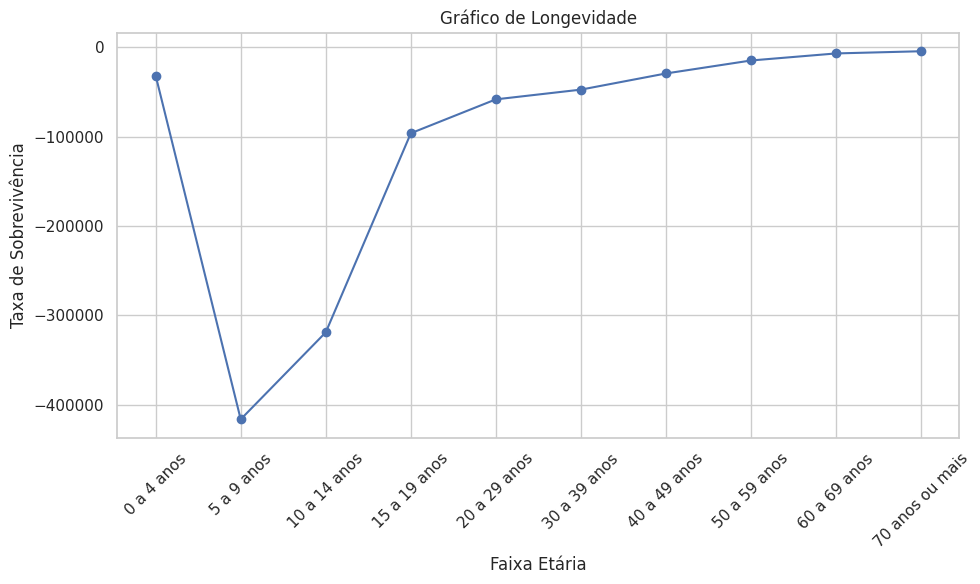

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(idade_faixas, taxa_sobrevivencia, marker='o', linestyle='-', color='b')
plt.title('Gráfico de Longevidade')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()